In [23]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers
 
import tensorflow as tf
import matplotlib.pyplot as plt

In [24]:
SEED_VALUE = 42    #used for random number generation.
 
# Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

### Loading dataset

In [25]:
# Load the Boston housing dataset.
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
 
print(X_train.shape)
print("\n")
print("Input features: ", X_train[0])       #prints the feature values of the first sample
print("\n")
print("Output target: ", y_train[0])

(404, 13)


Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target:  15.2


In [26]:
boston_features = {
    'Average Number of Rooms':5,
}
 
X_train_1d = X_train[:, boston_features['Average Number of Rooms']]
print(X_train_1d.shape)
 
X_test_1d = X_test[:, boston_features['Average Number of Rooms']]


(404,)


### Visualization

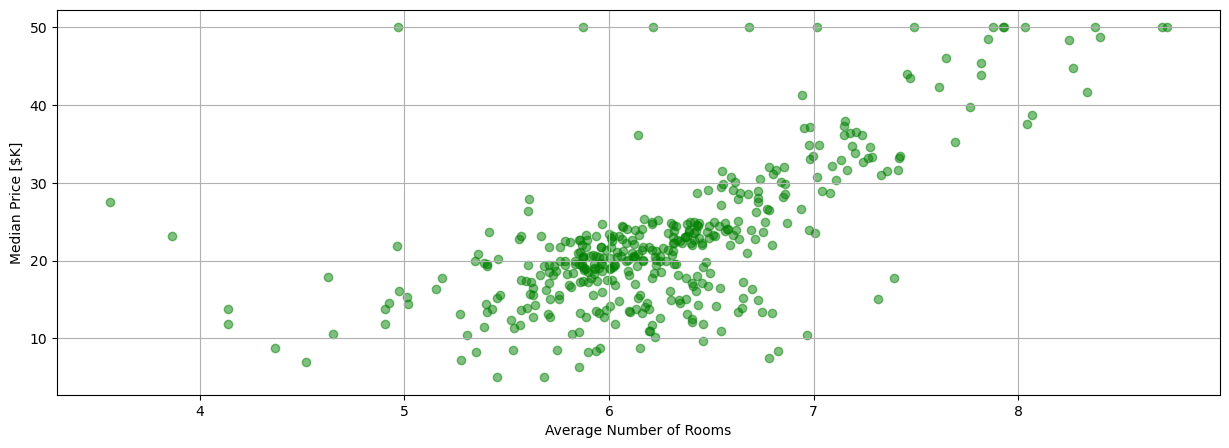

In [27]:
plt.figure(figsize=(15, 5))
 
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Price [$K]')
plt.grid("on")
plt.scatter(X_train_1d[:], y_train, color='green', alpha=0.5);


### Model Building

In [28]:
model = Sequential()
 
# Define the model consisting of a single neuron.
model.add(Dense(units=1, input_shape=(1,)))        #layer will have one neuron.
                                                    #Only one layes used - dense (fully connected layer)
 
# Display a summary of the model architecture.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.005), loss='mse')            # RMSprop - optimization algorithm used for training neural networks


### Model Fitting

In [30]:
history = model.fit(X_train_1d, 
                    y_train, 
                    batch_size=16, 
                    epochs=101, 
                    validation_split=0.3)


# batch size specifies the number of samples to use in each iteration of gradient descent during training.
#An epoch is one complete pass through the entire training dataset.
#Here, the training process will iterate over the entire dataset 101 times.


#validation_split=0.3 - specifies the fraction of the training data to be used for validation.

Epoch 1/101
18/18 [==============================] - 1s 15ms/step - loss: 849.0981 - val_loss: 935.4102
Epoch 2/101
18/18 [==============================] - 0s 6ms/step - loss: 807.8428 - val_loss: 896.5051
Epoch 3/101
18/18 [==============================] - 0s 7ms/step - loss: 772.4127 - val_loss: 860.0813
Epoch 4/101
18/18 [==============================] - 0s 6ms/step - loss: 738.5351 - val_loss: 824.4341
Epoch 5/101
18/18 [==============================] - 0s 7ms/step - loss: 705.1327 - val_loss: 789.1832
Epoch 6/101
18/18 [==============================] - 0s 5ms/step - loss: 672.6075 - val_loss: 755.1723
Epoch 7/101
18/18 [==============================] - 0s 7ms/step - loss: 641.0863 - val_loss: 721.6781
Epoch 8/101
18/18 [==============================] - 0s 5ms/step - loss: 610.5314 - val_loss: 689.7831
Epoch 9/101
18/18 [==============================] - 0s 6ms/step - loss: 580.7728 - val_loss: 658.1169
Epoch 10/101
18/18 [==============================] - 0s 7ms/step - loss

18/18 [==============================] - 0s 10ms/step - loss: 56.0368 - val_loss: 77.1223
Epoch 81/101
18/18 [==============================] - 0s 8ms/step - loss: 56.0161 - val_loss: 77.2368
Epoch 82/101
18/18 [==============================] - 0s 10ms/step - loss: 56.0545 - val_loss: 77.2424
Epoch 83/101
18/18 [==============================] - 0s 7ms/step - loss: 56.0142 - val_loss: 77.2611
Epoch 84/101
18/18 [==============================] - 0s 6ms/step - loss: 56.0084 - val_loss: 77.2070
Epoch 85/101
18/18 [==============================] - 0s 5ms/step - loss: 56.0092 - val_loss: 77.0801
Epoch 86/101
18/18 [==============================] - 0s 6ms/step - loss: 55.9879 - val_loss: 77.0886
Epoch 87/101
18/18 [==============================] - 0s 5ms/step - loss: 55.9696 - val_loss: 77.0675
Epoch 88/101
18/18 [==============================] - 0s 9ms/step - loss: 55.9605 - val_loss: 77.0879
Epoch 89/101
18/18 [==============================] - 0s 8ms/step - loss: 55.9542 - val_loss:

### Validation

In [31]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

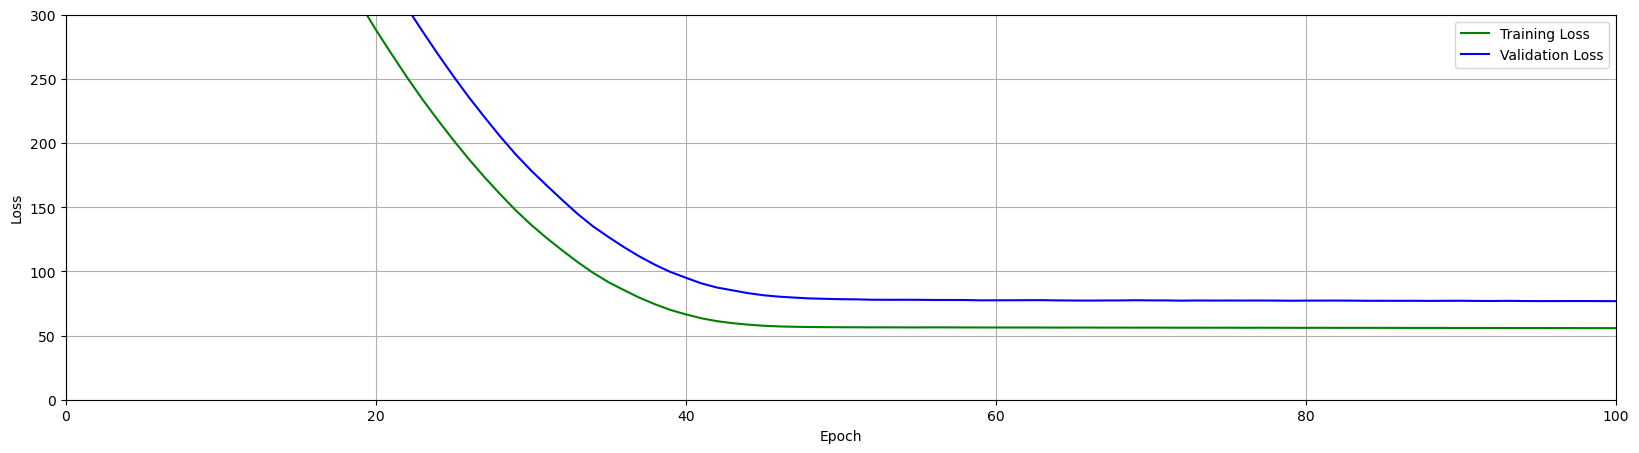

In [32]:
plot_loss(history)

### Prediction

In [33]:
# Predict the median price of a home with [3, 4, 5, 6, 7] rooms.
x = [3, 4, 5, 6, 7]
y_pred = model.predict(x)
for idx in range(len(x)):
    print("Predicted price of a home with {} rooms: ${}K".format(x[idx], int(y_pred[idx]*10)/10))

1/1 [==============================] - 0s 102ms/step
Predicted price of a home with 3 rooms: $12.2K
Predicted price of a home with 4 rooms: $15.3K
Predicted price of a home with 5 rooms: $18.4K
Predicted price of a home with 6 rooms: $21.4K
Predicted price of a home with 7 rooms: $24.5K


In [34]:
# Generate feature data that spans the range of interest for the independent variable.
x = tf.linspace(3, 9, 10)
 
# Use the model to predict the dependent variable.
y = model.predict(x)

1/1 [==============================] - 0s 78ms/step


### Conclusion

In [35]:
def plot_data(x_data, y_data, x, y, title=None):
    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

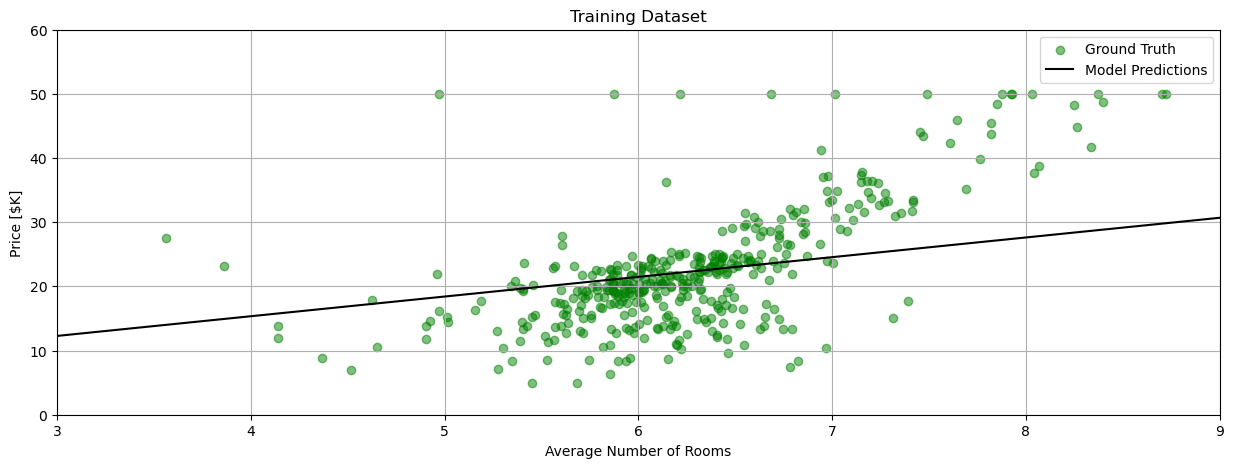

In [36]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')

# positive correlation between the average number of rooms and the price of the house

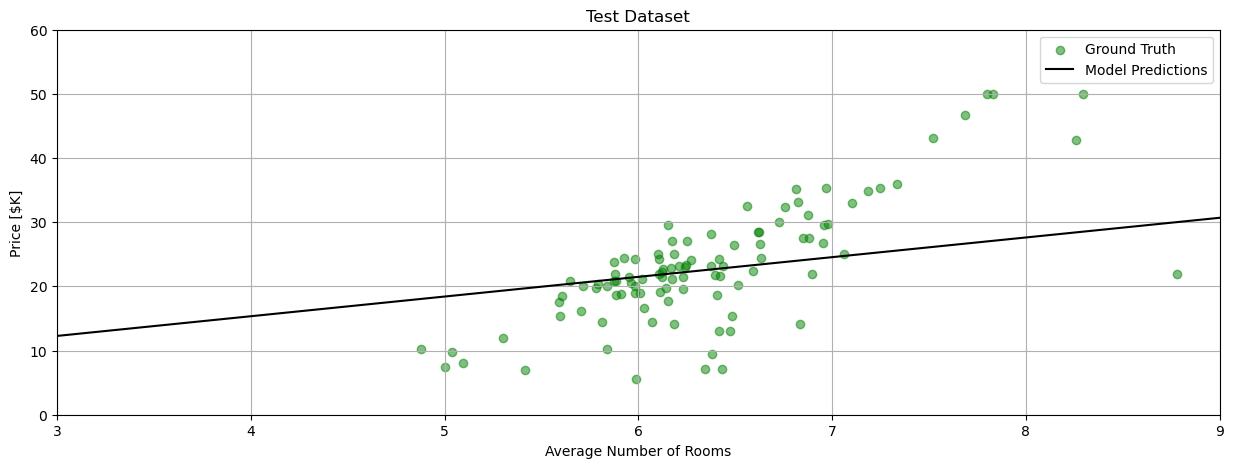

In [37]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')
